<a href="https://www.kaggle.com/code/muhammedesadseker/practice-with-pokemon-data-data-analysis-and-visu?scriptVersionId=121112789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # to visualize the pokemon data
import seaborn as sns # to visualize the pokemon data
plt.style.use("seaborn-whitegrid") # this style gives grid in plots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [2]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv") # to define a csv data we use pd.read_csv()
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
data.info() # .info() it gives summary of data to us 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
data.corr() # .corr() means correlation.  

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


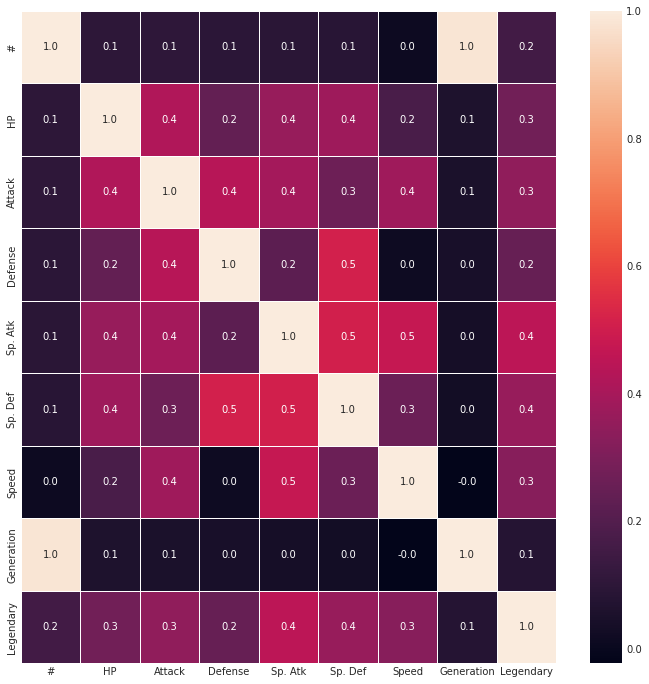

In [5]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt=".1f",linewidths=.5,ax = ax) # we can also use seaborn to visualize the data.
plt.show()

In [6]:
data.head() # head() shows first 5 columns if we use head(10) like this, it will show first 10 columns

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
data.columns # columns of data

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

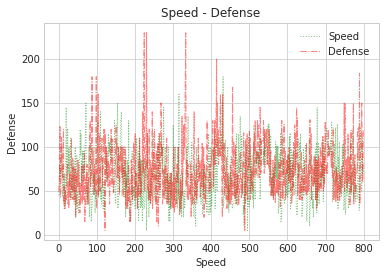

In [8]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind="line",color="g",label="Speed",linewidth=1,alpha=0.5,grid=True,linestyle=":")
data.Defense.plot(kind="line",color="r",label="Defense",linewidth=1,alpha=0.5,grid=True,linestyle="-.")
plt.legend(loc ='upper right') # legend = puts label into plot
plt.xlabel("Speed") # label = name of label
plt.ylabel("Defense") 
plt.title("Speed - Defense") # title = title of plot
plt.show()

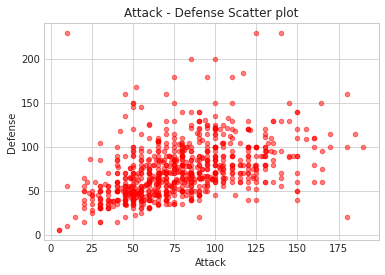

In [9]:
# Scatter Plot
# x = attack, y = defense
data.plot(kind="scatter",x="Attack",y="Defense",alpha=0.5,color="red")
plt.xlabel("Attack") # label = name of label
plt.ylabel("Defense")
plt.title("Attack - Defense Scatter plot") # title = title of plot
plt.show()

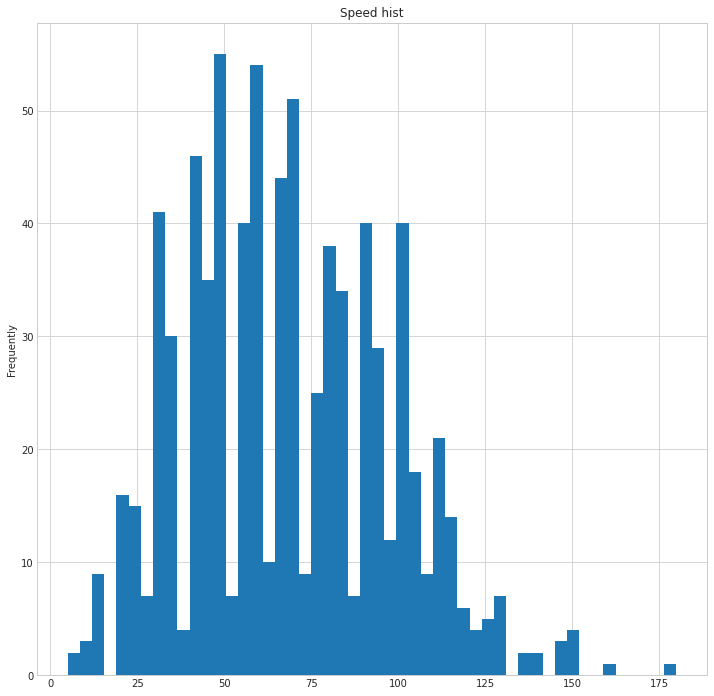

In [10]:
# Histogram
# bins = number of bar in figure

data.Speed.plot(kind="hist",bins=50,figsize=(12,12))
plt.title("Speed hist")
plt.ylabel("Frequently")
plt.show()

In [11]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

In [12]:
dictionary = {'spain':'madrid','usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [13]:
dictionary['spain'] = 'barcelona' # we can change an exist value in the dictionary
print(dictionary)
dictionary['france'] = 'paris' # and we can create a value
print(dictionary)
del dictionary['spain']
print(dictionary)
print('france' in dictionary)
dictionary.clear()
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [14]:
del dictionary

In [15]:
#print(dictionary)    #dictionary was not found because we just deleted the dictionary data

In [16]:
series = data['Defense']
print(type(series))
data_frame=data[['Defense']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
# 1 - Filtering Pandas data frame
data[data['Defense']>200]    # There are only 3 pokemons who have higher defense value than 200

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [18]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [19]:
# This is also same with previous code line. Therefore we can also use ('&'== and) for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [20]:
threshold = data.Speed.mean()
threshold # this is mean of speed column

68.2775

In [21]:
# in here we create a new column that is level of speed 
# if speed higher than 68 ,then speed level will be high.
data['Speed level'] = [ 'High' if i>threshold else 'Low' for i in data.Speed] 
data.loc[:10,['Name','Speed','Speed level']] 

,Name,Speed,Speed level
0,Bulbasaur,45,Low
1,Ivysaur,60,Low
2,Venusaur,80,High
3,Mega Venusaur,80,High
4,Charmander,65,Low
5,Charmeleon,80,High
6,Charizard,100,High
7,Mega Charizard X,100,High
8,Mega Charizard Y,100,High
9,Squirtle,43,Low


In [22]:
data = pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [23]:
data.tail(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False
792,793,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [24]:
data[np.logical_and(data["HP"]>120,data["Sp. Atk"]>150)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True


In [25]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [26]:
data.shape # shape shows us how many the data have columns and rows

(800, 12)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [28]:
print(data['Type 1'].value_counts(dropna=False)) # value_counts() function gives how many types there are

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [29]:
data.describe() # ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


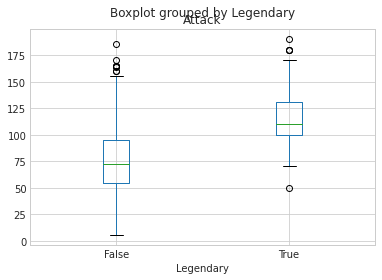

In [30]:
#Box plots: visualize basic statistics like outliers, min/max or quantiles
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Green line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column ='Attack',by='Legendary') 
plt.show()

In [31]:
data_new = data.copy().head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [32]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars='Name',value_vars=['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [33]:
# PIVOTING DATA¶== Reverse of melting
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index='Name',columns='variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [34]:
# Firstly lets create 2 data frame
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis = 0,ignore_index = True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [35]:
data1 = data.Attack.head()
data2 = data.Defense.head()
conc_data_col= pd.concat([data1,data2],axis=1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [36]:
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1['Type 2'].dropna(inplace = True)
# inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [37]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

In [38]:
data['Type 2'].fillna('Empty',inplace=True)
data['Type 2'].head()

0    Poison
1    Poison
2    Poison
3    Poison
4     Empty
Name: Type 2, dtype: object

In [39]:
#We can build data frames from csv as we did earlier.
#Also we can build dataframe from dictionaries
#zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
#Adding new column
#Broadcasting: Create new column and assign a value to entire column

country = ['Spain','France']
population = ['11','12']
list_label = ['Country','Population']
list_col = [country,population]
zipped = list(zip(list_label,list_col))
datadic= dict(zipped)
df = pd.DataFrame(datadic)
df

,Country,Population
0,Spain,11
1,France,12


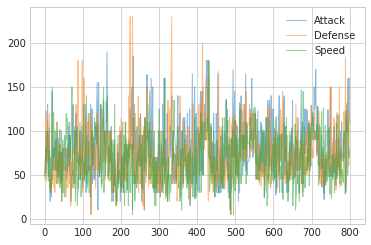

In [40]:
# Plotting all data 
data1 = data.loc[:,['Attack','Defense','Speed']]
data1.plot(alpha=0.5,grid=True,linewidth = 1,)
plt.show()

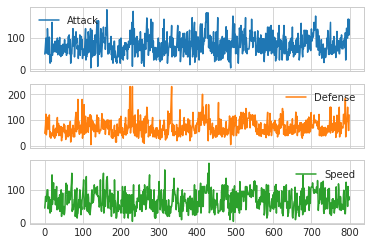

In [41]:
# subplots
data1.plot(subplots=True)
plt.show()

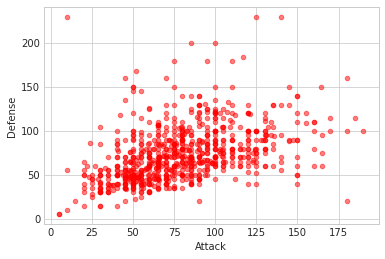

In [42]:
# scatter plot
data1.plot(kind='scatter',x='Attack',y='Defense',color="r",alpha=.5)
plt.show()

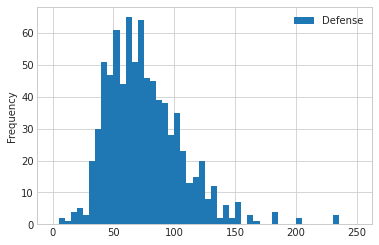

In [43]:
# histogram plot
data1.plot(kind="hist",bins=50,y="Defense",range=(0,250))
plt.show()

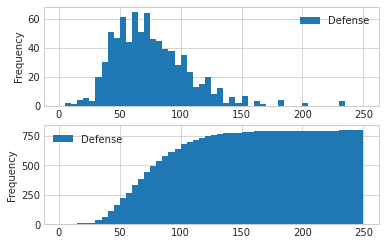

In [44]:
# histogram subplot with non cumulative and cumulative
fig,axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind="hist",y='Defense',bins=50,range=(0,250),ax=axes[0])
data1.plot(kind='hist',y='Defense',bins=50,range=(0,250),ax=axes[1],cumulative=True)
plt.show()

In [45]:
time_list = ["1992-03-08","1992-04-12"]
datatime_object = pd.to_datetime(time_list)
print(type(datatime_object))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [46]:
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2['date'] = datetime_object
# lets make date as index
data2 = data2.set_index('date')
data2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,Empty,39,52,43,60,50,65,1,False


In [47]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,0.0


In [48]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [50]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")
data = data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [51]:
def div(n):
    return n*5
data.Attack.apply(div)

#
1      245
2      310
3      410
4      500
5      260
      ... 
796    500
797    800
798    550
799    800
800    550
Name: Attack, Length: 800, dtype: int64

In [52]:
data.index.name = "index_name"
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
index_name,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [53]:
data.index = range(100,900,1)
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [54]:
data= pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [55]:
data1 = data.set_index(["Type 1","Type 2"])
data1.head(50)

#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1   Type 2                                                                 
Grass    Poison   1         Bulbasaur   45      49       49       65       65   
         Poison   2           Ivysaur   60      62       63       80       80   
         Poison   3          Venusaur   80      82       83      100      100   
         Poison   4     Mega Venusaur   80     100      123      122      120   
Fire     NaN      5        Charmander   39      52       43       60       50   
         NaN      6        Charmeleon   58      64       58       80       65   
         Flying   7         Charizard   78      84       78      109       85   
         Dragon   8  Mega Charizard X   78     130      111      130       85   
         Flying   9  Mega Charizard Y   78     104       78      159      115   
Water    NaN     10          Squirtle   44      48       65       50       64   
         NaN     11         Wartortle   59      63       80       65       80   
         NaN     12         Blastoise   79      83      100       85      105   
         NaN     13    Mega Blastoise   79     103      120      135      115   
Bug      NaN     14          Caterpie   45      30       35       20       20   
         NaN     15           Metapod   50      20       55       25       25   
         Flying  16        Butterfree   60      45       50       90       80   
         Poison  17            Weedle   40      35       30       20       20   
         Poison  18            Kakuna   45      25       50       25       25   
         Poison  19          Beedrill   65      90       40       45       80   
         Poison  20     Mega Beedrill   65     150       40       15       80   
Normal   Flying  21            Pidgey   40      45       40       35       35   
         Flying  22         Pidgeotto   63      60       55       50       50   
         Flying  23           Pidgeot   83      80       75       70       70   
         Flying  24      Mega Pidgeot   83      80       80      135       80   
         NaN     25           Rattata   30      56       35       25       35   
         NaN     26          Raticate   55      81       60       50       70   
         Flying  27           Spearow   40      60       30       31       31   
         Flying  28            Fearow   65      90       65       61       61   
Poison   NaN     29             Ekans   35      60       44       40       54   
         NaN     30             Arbok   60      85       69       65       79   
Electric NaN     31           Pikachu   35      55       40       50       50   
         NaN     32            Raichu   60      90       55       90       80   
Ground   NaN     33         Sandshrew   50      75       85       20       30   
         NaN     34         Sandslash   75     100      110       45       55   
Poison   NaN     35          Nidoran♀   55      47       52       40       40   
         NaN     36          Nidorina   70      62       67       55       55   
         Ground  37         Nidoqueen   90      92       87       75       85   
         NaN     38          Nidoran♂   46      57       40       40       40   
         NaN     39          Nidorino   61      72       57       55       55   
         Ground  40          Nidoking   81     102       77       85       75   
Fairy    NaN     41          Clefairy   70      45       48       60       65   
         NaN     42          Clefable   95      70       73       95       90   
Fire     NaN     43            Vulpix   38      41       40       50       65   
         NaN     44         Ninetales   73      76       75       81      100   
Normal   Fairy   45        Jigglypuff  115      45       20       45       25   
         Fairy   46        Wigglytuff  140      70       45       85       50   
Poison   Flying  47             Zubat   40      45       35       30       40   
         Flying  48            Golbat   75      8

In [56]:
data1.loc["Fire","Flying"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                  
Fire   Flying    7         Charizard   78      84       78      109       85   
       Flying    9  Mega Charizard Y   78     104       78      159      115   
       Flying  159           Moltres   90     100       90      125       85   
       Flying  271             Ho-oh  106     130       90      110      154   
       Flying  731       Fletchinder   62      73       55       56       52   
       Flying  732        Talonflame   78      81       71       74       69   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Fire   Flying    100           1      False  
       Flying    100           1      False  
       Flying     90           1       True  
       Flying     90           2       True  
       Flying     84           6      False  
       Flying    126           6      False

In [57]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [58]:
df.pivot(index="treatment",columns=("gender"),values=("response"))

gender,F,M
treatment,,
A,10,45
B,5,9


In [59]:
df1 = df.set_index(["treatment","gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [60]:
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [61]:
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [62]:
df2= df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


In [63]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [64]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


In [65]:
df.groupby("gender")

In [66]:
df.groupby("treatment").mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [67]:
df.groupby("treatment").age.max()

treatment
A    15
B    72
Name: age, dtype: int64

In [68]:
df.groupby("treatment")[["age","response"]].min()

,age,response
treatment,,
A,4,10
B,65,5
